In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets

iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=666)

In [13]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(multi_class='ovr')

In [14]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
log_reg.score(X_test,y_test)

0.7894736842105263

In [16]:
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1)
    )
    X_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(X_new)
    zz=y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,linewidth=5,cmap=custom_cmap)
    
    
    
    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


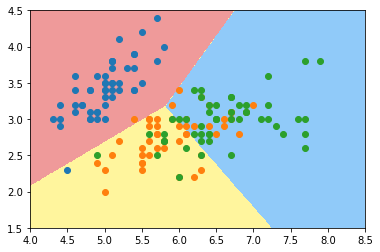

In [17]:
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [18]:
log_reg2=LogisticRegression(multi_class='multinomial',solver='newton-cg')

In [19]:
log_reg2.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
log_reg2.score(X_test,y_test)

0.7894736842105263

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


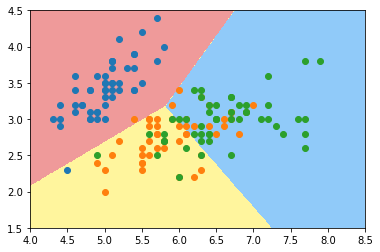

In [21]:
plot_decision_boundary(log_reg,axis=[4,8.5,1.5,4.5])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

### OvO and OvR

In [24]:
from sklearn.multiclass import OneVsRestClassifier

In [25]:
ovr=OneVsRestClassifier(log_reg)

In [26]:
ovr.fit(X_train,y_train)
ovr.score(X_test,y_test)

0.7894736842105263